# How to run reV Locally

[reV Gen](https://nrel.github.io/reV/reV/reV.generation.generation.html#reV.generation.generation.Gen) and [reV Econ](https://nrel.github.io/reV/reV/reV.econ.econ.html#reV.econ.econ.Econ) can be run locally using resource .h5 files stored locally or using the [HDF Groups](https://www.hdfgroup.org) Highly Scalable Distributed Service (HSDS) to access resource .h5 file stored in the cloud (currenly on Amazon Web Services -- AWS).

reV use [PySAM](https://pysam.readthedocs.io/en/latest/) to
compute technologically specific capcity factor means and profiles (`Gen`) and mean levelized cost of energy (`Econ`). `reV`
uses ``SAM`` technology terms and input configuration files. 

There are examples below and also in the reV generation class documentation [here](https://nrel.github.io/reV/reV/reV.generation.generation.html#reV.generation.generation.Gen).

NOTE: In all of these examples, the ``sam_file`` input points to files in
the reV test directory [`TESTDATADIR`](https://github.com/NREL/reV/tree/master/tests/data) that may not be copied in your install. You may want to download the relevant SAM system configs from that directory and point the ``sam_file`` variable to the correct filepath on your computer.

## Running reV Gen+Econ
### Locally

NOTE: as with the `sam_file` path metioned above, the `res_file` path references files in reVs `TESTDATADIR` you might need to download them from [github](https://github.com/NREL/reV/tree/main/tests/data) and point the `res_file` variable to the correct file path on your computer.

#### windpower

Compute wind capacity factors for a given set of latitude and longitude
coordinates:

In [89]:
PVW5 = 'pvwattsv5'
PVW7 = 'pvwattsv7'
PVS1 = 'pvsamv1'
TCSMS = 'tcsmoltensalt'
SOLWH = 'solarwaterheat'
TROPH = 'troughphysicalheat'
LINDS = 'lineardirectsteam'
WIND = 'windpower'
WAVE = 'mhkwave'

SOLAR_TECH = [PVW5, PVW7, PVS1, TCSMS, SOLWH, TROPH, LINDS]
WIND_TECH = [WIND]
WAVE_TECH = [WAVE]

ALL_TECH = {
    'solar': SOLAR_TECH,
    'wind': WIND_TECH,
    'wave': WAVE_TECH
}

TECH_NAMES = {
    PVW5: 'Photovoltaic', 
    PVW7: 'Photovoltaic', 
    PVS1: 'Photovoltaic', 
    TCSMS: 'Molten Salt', 
    SOLWH: 'Solar Water Heat', 
    TROPH: 'Trough Phys. Heat', 
    LINDS: 'Linear Direct Steam', 
    WIND: 'Wind Power', 
    WAVE: 'Wave Power'
}


In [96]:
import os
import numpy as np
from reV import TESTDATADIR
from reV.config.project_points import ProjectPoints
from reV.generation.generation import Gen

lat_lons = np.array([[ 41.25, -71.66],
                     [ 41.05, -71.74],
                     [ 41.97, -71.78],
                     [ 41.65, -71.74],
                     [ 41.25, -71.7 ],
                     [ 41.05, -71.78]])

res_file = os.path.join(TESTDATADIR, 'wtk/ri_100_wtk_2012.h5')
sam_file = os.path.join(TESTDATADIR,
                            'SAM/wind_gen_standard_losses_0.json')

pp = ProjectPoints.lat_lon_coords(lat_lons, res_file, sam_file)
gen = Gen.reV_run('windpower', pp, sam_file, res_file,
                    max_workers=1, out_fpath=None,
                    output_request=('cf_mean', 'cf_profile'))  # Capacity Factor
display(gen.out['cf_mean'])
display(gen.out['cf_profile'])

d:\projects\python\energycapability\rev\reV\config\project_points.py:581: UserWarning: WARNING: points are not in sequential order and will be sorted! The original order is being preserved under column "points_order"
  warn(msg)
It appears old SAM v1 keys are being used. Updated key "wind_farm_losses_percent" to "turb_generic_loss".
d:\projects\python\energycapability\rev\reV\SAM\version_checker.py:101: PySAMVersionWarning: It appears old SAM v1 keys are being used. Updated key "wind_farm_losses_percent" to "turb_generic_loss".
  warn(m, PySAMVersionWarning)


array([0.35720587, 0.37741643, 0.500766  , 0.48840794, 0.50351036,
       0.4890139 ], dtype=float32)

array([[0.319, 0.485, 0.6  , 0.543, 0.579, 0.486],
       [0.382, 0.444, 0.288, 0.562, 0.339, 0.601],
       [0.696, 0.398, 0.5  , 0.656, 0.466, 0.677],
       ...,
       [0.833, 0.833, 0.833, 0.833, 0.833, 0.833],
       [0.782, 0.833, 0.833, 0.833, 0.833, 0.833],
       [0.756, 0.833, 0.833, 0.833, 0.833, 0.833]], dtype=float32)

In [104]:
%%capture
import pandas as pd
results = []

lat_lons = np.array([[41.25, -71.66],
                     [41.05, -71.74],
                     [41.97, -71.78],
                     [41.65, -71.74],
                     [41.25, -71.7],
                     [41.05, -71.78]])

res_file = os.path.join(TESTDATADIR, 'wtk/ri_100_wtk_2012.h5')

sam_files = {
    'solar': ,
    'wind': 'SAM/wind_gen_standard_losses_0.json',
    'wave': 
}
for tech_type, tech_list in ALL_TECH.items():
    sam_file = os.path.join(TESTDATADIR, sam_files[tech_type])
    pp = ProjectPoints.lat_lon_coords(lat_lons, res_file, sam_file)
    gen = Gen.reV_run(tech, pp, sam_file, res_file,
                    max_workers=1, out_fpath=None,
                    output_request=('annual_energy',))  # ('cf_mean', 'cf_profile'))
    results.append(gen.out)



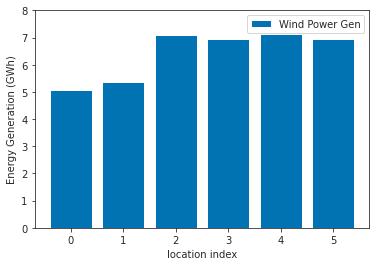

In [130]:
import matplotlib.pyplot as plt
KWH_TO_GWH = 1e-6
data = np.array([_['annual_energy'] * KWH_TO_GWH for _ in results])[0]
plt.bar(list(range(len(data))), data, label='Wind Power Gen')
plt.ylim([0, 8.])
plt.ylabel('Energy Generation (GWh)')
plt.xlabel('location index')
plt.legend()


<AxesSubplot:>

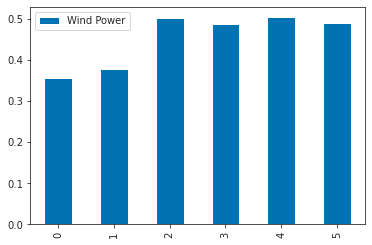

In [92]:
cf_means = np.array([_['cf_mean'] for _ in results])
cf_profile = np.array([_['cf_profile'] for _ in results])
DUPLICATES = [PVW5, PVW7]
cf_data = pd.DataFrame({TECH_NAMES[tech]: cf_means[i] for i, tech in enumerate(
    WIND_TECH) if tech not in DUPLICATES})

cf_data.plot.bar(stacked=True)


0    2.500441
1    2.641915
2    3.505362
3    3.418855
4    3.524573
5    3.423097
dtype: float32

### pvwatts

NOTE: ``pvwattsv5`` and ``pvwattsv7`` are both available from reV.

Compute pv capacity factors and lcoe for all resource gids in Rhode Island:

In [ ]:
import os
from reV import TESTDATADIR
from reV.config.project_points import ProjectPoints
from reV.generation.generation import Gen

regions = {'Rhode Island': 'state'}

res_file = os.path.join(TESTDATADIR, 'nsrdb/', 'ri_100_nsrdb_2012.h5')
sam_file = os.path.join(TESTDATADIR, 'SAM/naris_pv_1axis_inv13.json')

pp = ProjectPoints.regions(regions, res_file, sam_file)
gen = Gen.reV_run('pvwattsv5', pp, sam_file, res_file,
                    max_workers=1, out_fpath=None,
                    output_request=('cf_mean', 'cf_profile', 'lcoe_fcr'))
display(gen.out['cf_mean'])
display(gen.out['lcoe_fcr'])

## Running Econ from an existing Generation file

While the most efficient way to run reV is to compute generation and econ outputs in SAM at the same time, reV can compute SAM derived Economic outputs from an existing reV Generation output stored in a .h5 file.

In [ ]:
import os
from reV import TESTDATADIR
from reV.config.project_points import ProjectPoints
from reV.econ.econ import Econ

cf_file = os.path.join(TESTDATADIR,
                        'gen_out/gen_ri_pv_2012_x000.h5')
sam_files = os.path.join(TESTDATADIR,
                            'SAM/i_lcoe_naris_pv_1axis_inv13.json')

points = slice(0, 100)
econ = Econ.reV_run(points, sam_files, cf_file,
                   year=2012, output_request='lcoe_fcr',
                   max_workers=1, sites_per_worker=25,
                   points_range=None, out_fpath=None)

display(econ.out['lcoe_fcr'])